# Ranking the sensors 


This preliminary work seeks to rank the sensors according to their importance/predictive power with respect to the class labels of the samples. Further data analysis, statistical and machine learning forecasting methods are required to determine exactly that generates a ranking of the sensors from the provided CSV file. 



Date : 16 Sep. 2019 

By: Mahboubeh Jannesari

Cell Phone : +49 177 878 0504

Email : mahboobeh.jannesary@gmail.com

#  Objective :  Ranking the sensors in decreasing order 

The data set consists of 400 samples where for each sample there are 10 different sensor readings available. The samples have been divided into two classes where the class 
label is either 1 or -1. 

# Software Prerequisites

Python 3.7 


Linux Ubuntu 16.04

# Steps should be covered : 

Steps divided into following processing items that to access required python packages as well as clean, reliable data for more accurate guess.

Principles and steps involved :


--Install required python packages (sklearn, Numpy, matplotlib, seanborn,xgboost, pandas)

--Loading Data from .csv file.

--Data Preparation.

--Feature Understanding.

--Train and validate machine learning models to classify the samples into 2 categories.

--Ranking the sensors (features).

--Feature extraction and improving the results.
 


# Install Python Packages (with Admin / Sudo permission)

## --- Upon system setting you should use (pip) or (pip3)  with sudo permission

In [ ]:
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install pandas

!pip install matplotlib
!pip install seaborn

!pip install xgboost


# A) Loading Packages

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split 
from scipy.stats import skew

from xgboost import XGBClassifier, plot_importance
%matplotlib inline



### Seaborn settings as below :

In [2]:
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')


# B) Loading Data


In [3]:
data=pd.read_csv("task_data.csv")
data.shape

(400, 12)

In [4]:
data.head()

,sample index,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
0,sample0,1.0,0.834251,0.726081,0.535904,0.214896,0.873788,0.767605,0.111308,0.557526,0.599650,0.665569
1,sample1,1.0,0.804059,0.253135,0.869867,0.334285,0.604075,0.494045,0.833575,0.194190,0.014966,0.802918
2,sample2,1.0,0.694404,0.595777,0.581294,0.799003,0.762857,0.651393,0.075905,0.007186,0.659633,0.831009
3,sample3,1.0,0.783690,0.038780,0.285043,0.627305,0.800620,0.486340,0.827723,0.339807,0.731343,0.892359
4,sample4,1.0,0.788835,0.174433,0.348770,0.938244,0.692065,0.377620,0.183760,0.616805,0.492899,0.930969


In [5]:
data.class_label.value_counts()

-1.0    200
 1.0    200
Name: class_label, dtype: int64

# C) Preparing Data 



## C-1) Checking variables and types

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
sample index    400 non-null object
class_label     400 non-null float64
sensor0         400 non-null float64
sensor1         400 non-null float64
sensor2         400 non-null float64
sensor3         400 non-null float64
sensor4         400 non-null float64
sensor5         400 non-null float64
sensor6         400 non-null float64
sensor7         400 non-null float64
sensor8         400 non-null float64
sensor9         400 non-null float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


## C-2) Unnecessary fields should be removed

In [7]:
del data["sample index"]




## C-3) Duplicated rows and entries should be removed 


In [8]:
## checking for duplicated entries
print("The number of duplicated rows", sum(data.duplicated(data.columns)))

data = data.drop_duplicates(data.columns,keep="last")
print("Double checking; duplicated rows",sum(data.duplicated(data.columns)))
print(" The number of Raw Data and features after duplicated rows removal: {}".
      format(data.shape))


The number of duplicated rows 0
Double checking; duplicated rows 0
 The number of Raw Data and features after duplicated rows removal: (400, 11)





## C-4) Checking the missing values

In [9]:
# Checking missing values: null values in columns
data.columns[data.isnull().any()]

Index([], dtype='object')

# D) Understanding the features 

### D-1) Pearson Correlation shows sensor 8, 4, 0, 3, 5, 7 are the most significant features 



Correlation between features and class label is: 

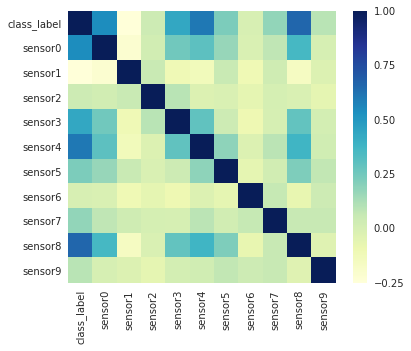

In [10]:
## Pearson Correlation Matrix Heatmap
corr = data.corr()
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(corr,cmap="YlGnBu", ax=ax)
plt.show()

In [11]:
#Sort ;  Correlation between class_label and features (sensors)
data.drop('class_label', axis=1).corrwith(data.class_label).abs().sort_values(ascending=False)


sensor8    0.660618
sensor4    0.607623
sensor0    0.543295
sensor3    0.433636
sensor1    0.252007
sensor5    0.224147
sensor7    0.175612
sensor9    0.094907
sensor2    0.038775
sensor6    0.007414
dtype: float64

## D-2) Understanding the feature distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fce25d4a208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fce1d4585c0>]], dtype=object)

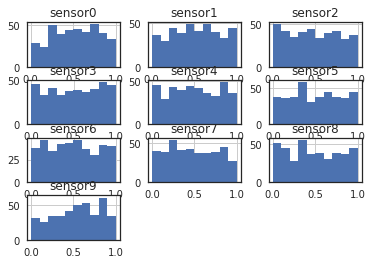

In [12]:
data.drop("class_label", axis=1).hist()


All features are scaled between 0 and 1.

Skewness for sensor0 -0.09
Skewness for sensor1 -0.06
Skewness for sensor2 0.05
Skewness for sensor3 -0.07
Skewness for sensor4 -0.03
Skewness for sensor5 0.01
Skewness for sensor6 0.05
Skewness for sensor7 0.08
Skewness for sensor8 0.07
Skewness for sensor9 -0.26


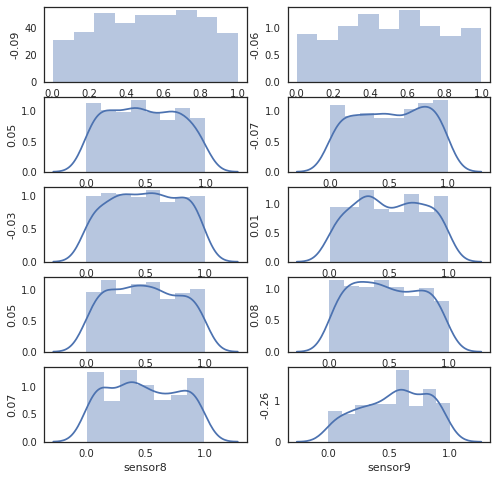

In [13]:
fig, axs = plt.subplots(figsize=(8,8), ncols=2, nrows=5)

i=0
for row in range(5):
    for col in (0, 1):
        
        print("Skewness for sensor%d"%i, data["sensor%d"%i].skew().round(2))
        sns.distplot(data["sensor%d"%i], kde=row, norm_hist=col, ax=axs[row, col])
        axs[row, col].set_ylabel(data["sensor%d"%i].skew().round(2))
        i +=1



### Data Suffling

In [14]:
data = data.sample(frac=1)

### Split data frame into labels (Y) and features (X). 

In [15]:
Y = data['class_label']
X = data.drop(['class_label'], axis=1)

X.shape , Y.shape

((400, 10), (400,))

## E) Perform the training using KFolds cross-validation method

### E-1) LogisticRegression

In [16]:
## 20-folds cross-validation
LR = LogisticRegression()
scores = cross_val_score(LR, X, Y, cv=20)
pred = cross_val_predict(LR, X, Y, cv=20)

print("Mean of scores-LogisticRegression (cross-validation) ", scores.mean())
print("Confusion Matrix for train data:\n", confusion_matrix(Y, pred))

Mean of scores-LogisticRegression (cross-validation)  0.9175
Confusion Matrix for train data:
 [[183  17]
 [ 16 184]]


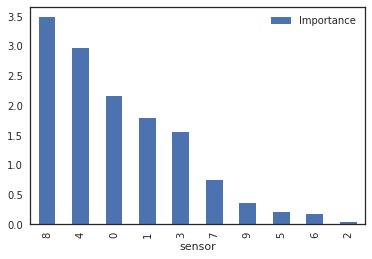

In [17]:
LR.fit(X, Y)
feature_imp = pd.DataFrame({"Feature": X.columns, "Importance": abs(LR.coef_[0])})

feature_imp.sort_values('Importance', ascending=False).plot.bar()
plt.xlabel("sensor")
plt.show()

### E-2) RandomForestClassifier

In [31]:
## 20-folds cross-validation
RF = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=1234)
scores = cross_val_score(RF, X, Y, cv=20)
pred = cross_val_predict(RF, X, Y, cv=20)

print("Mean of scores-RandomForestClassifier (cross-validation) ", scores.mean())
print("Confusion Matrix for train data:\n", confusion_matrix(Y, pred))

Mean of scores-RandomForestClassifier (cross-validation)  0.99
Confusion Matrix for train data:
 [[196   4]
 [  0 200]]


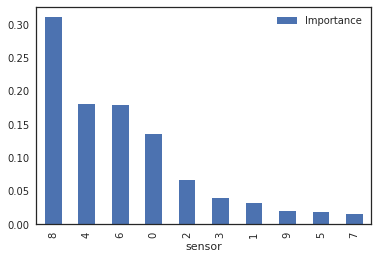

In [19]:
RF.fit(X, Y)
feature_imp = pd.DataFrame({'Feature':X.columns, 'Importance':RF.feature_importances_})
feature_imp.sort_values('Importance', ascending=False).plot.bar()
plt.xlabel("sensor")
plt.show()

### E-3) XGBClassifier

In [30]:
## 20-folds cross-validation
XGB = XGBClassifier(objective='binary:logistic',
                    seed=1234, importance_type='gain')
scores = cross_val_score(XGB, X, Y, cv=20)
pred = cross_val_predict(XGB, X, Y, cv=20)

print("Mean of scores-XGBClassifier (cross-validation) ", scores.mean())
print("Confusion Matrix for train data:\n", confusion_matrix(Y, pred))

Mean of scores-XGBClassifier (cross-validation)  0.995
Confusion Matrix for train data:
 [[199   1]
 [  1 199]]


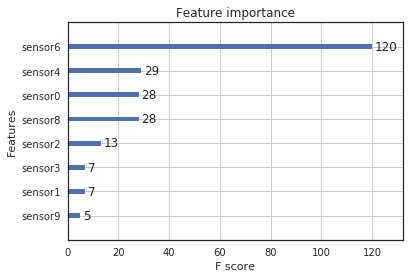

In [21]:
XGB.fit(X, Y)

plot_importance(XGB)
plt.show()

Sensor 6, 4, 0, 8, 2, 3, 1, 9 are the most important features.

# F) Feature extraction

Adding some new features and testing the results. 

In [22]:
# Combination of features may work well
Xnew = X.copy()
cols = list(X.columns)
i = 0
for c1 in cols:
  j = 0
  for c2 in cols:
    if i<j:
      Xnew[c1+'+'+c2] = Xnew[c1] + Xnew[c2]
      Xnew[c1+'*'+c2] = Xnew[c1] * Xnew[c2]
      Xnew[c1+'/'+c2] = Xnew[c1] / Xnew[c2]
    j += 1
  i+= 1
Xnew.head()

,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor6/sensor9,sensor7+sensor8,sensor7*sensor8,sensor7/sensor8,sensor7+sensor9,sensor7*sensor9,sensor7/sensor9,sensor8+sensor9,sensor8*sensor9,sensor8/sensor9
295,0.222105,0.984194,0.908944,0.426193,0.347861,0.867636,0.322781,0.074216,0.187328,0.636771,...,0.506902,0.261545,0.013903,0.396184,0.710988,0.047259,0.116551,0.824100,0.119285,0.294185
84,0.446318,0.163989,0.514030,0.639158,0.517572,0.912670,0.197601,0.513491,0.741694,0.887076,...,0.222756,1.255185,0.380853,0.692322,1.400567,0.455506,0.578858,1.628770,0.657939,0.836110
195,0.666154,0.709931,0.285043,0.853337,0.839084,0.331234,0.195003,0.122558,0.592359,0.182752,...,1.067037,0.714917,0.072599,0.206899,0.305310,0.022398,0.670628,0.775111,0.108255,3.241330
63,0.252218,0.444951,0.374988,0.908446,0.763676,0.494045,0.075936,0.298351,0.300456,0.898340,...,0.084529,0.598807,0.089641,0.992995,1.196691,0.268021,0.332113,1.198796,0.269911,0.334456
212,0.230011,0.446297,0.146986,0.141634,0.222979,0.118572,0.397618,0.344630,0.214528,0.947729,...,0.419548,0.559159,0.073933,1.606457,1.292359,0.326616,0.363638,1.162257,0.203315,0.226360


In [29]:
## 20-folds cross-validation
XGB = XGBClassifier(objective='binary:logistic', early_stopping_rounds=7,
                    seed=1234, importance_type='gain')
scores = cross_val_score(XGB, X, Y, cv=20)
pred = cross_val_predict(XGB, X, Y, cv=20)

print("Mean of scores-XGBClassifier (cross-validation) ", scores.mean())
print("Confusion Matrix for train data:\n", confusion_matrix(Y, pred))

Mean of scores-XGBClassifier (cross-validation)  0.995
Confusion Matrix for train data:
 [[199   1]
 [  1 199]]


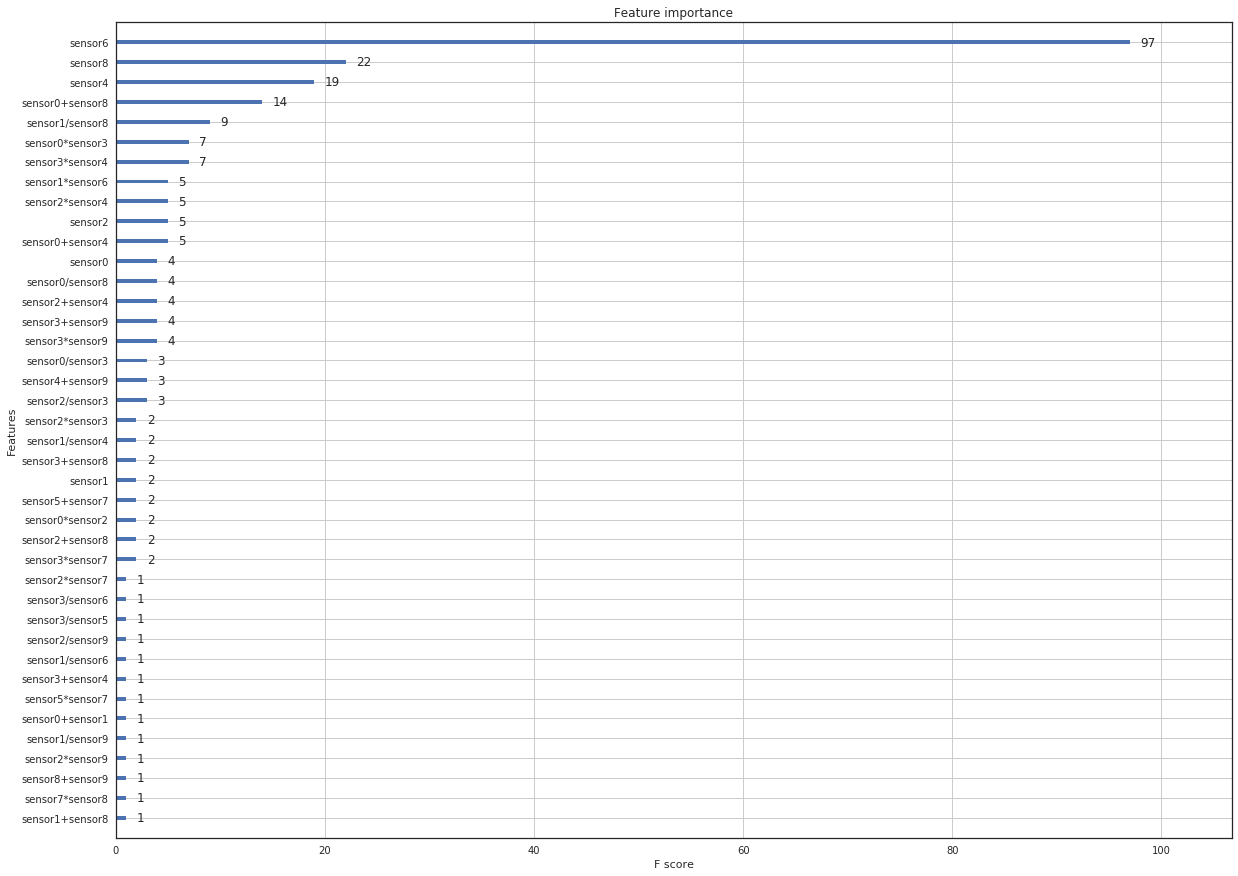

In [27]:
XGB.fit(Xnew, Y)

plot_importance(XGB)
plt.rcParams["figure.figsize"] = (30,15)
plt.show()

Sensor 6, 8, 4, 2, 0, 1 are the most important features.